In [17]:
from matplotlib import pyplot as plt
plt.style.use('plot-style.txt')
import numpy as np
from seaborn import color_palette as snscolors
color_pallete = snscolors('colorblind')
color_pallete

/tmp/ipykernel_19505/3964401294.py:2: UserWarning: Style includes a parameter, 'figure.max_open_warning', that is not related to style.  Ignoring this parameter.
  plt.style.use('plot-style.txt')


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [3]:
# this step requires you to have run the montepyython likelihood with plot_debug = True!
Clfile = np.load('../../montepython_public/data/euclid_photometric_Cls.npz')

# loaded file is a dictinoray containing the Ceeell array and vectors for the ells for difrent probes
Cl_LL = Clfile['Cl_LL']
ells_LL= Clfile['ells_LL']
Cl_GG = Clfile['Cl_GG']
ells_GG= Clfile['ells_GG']

(10, 3139.9754627511397)

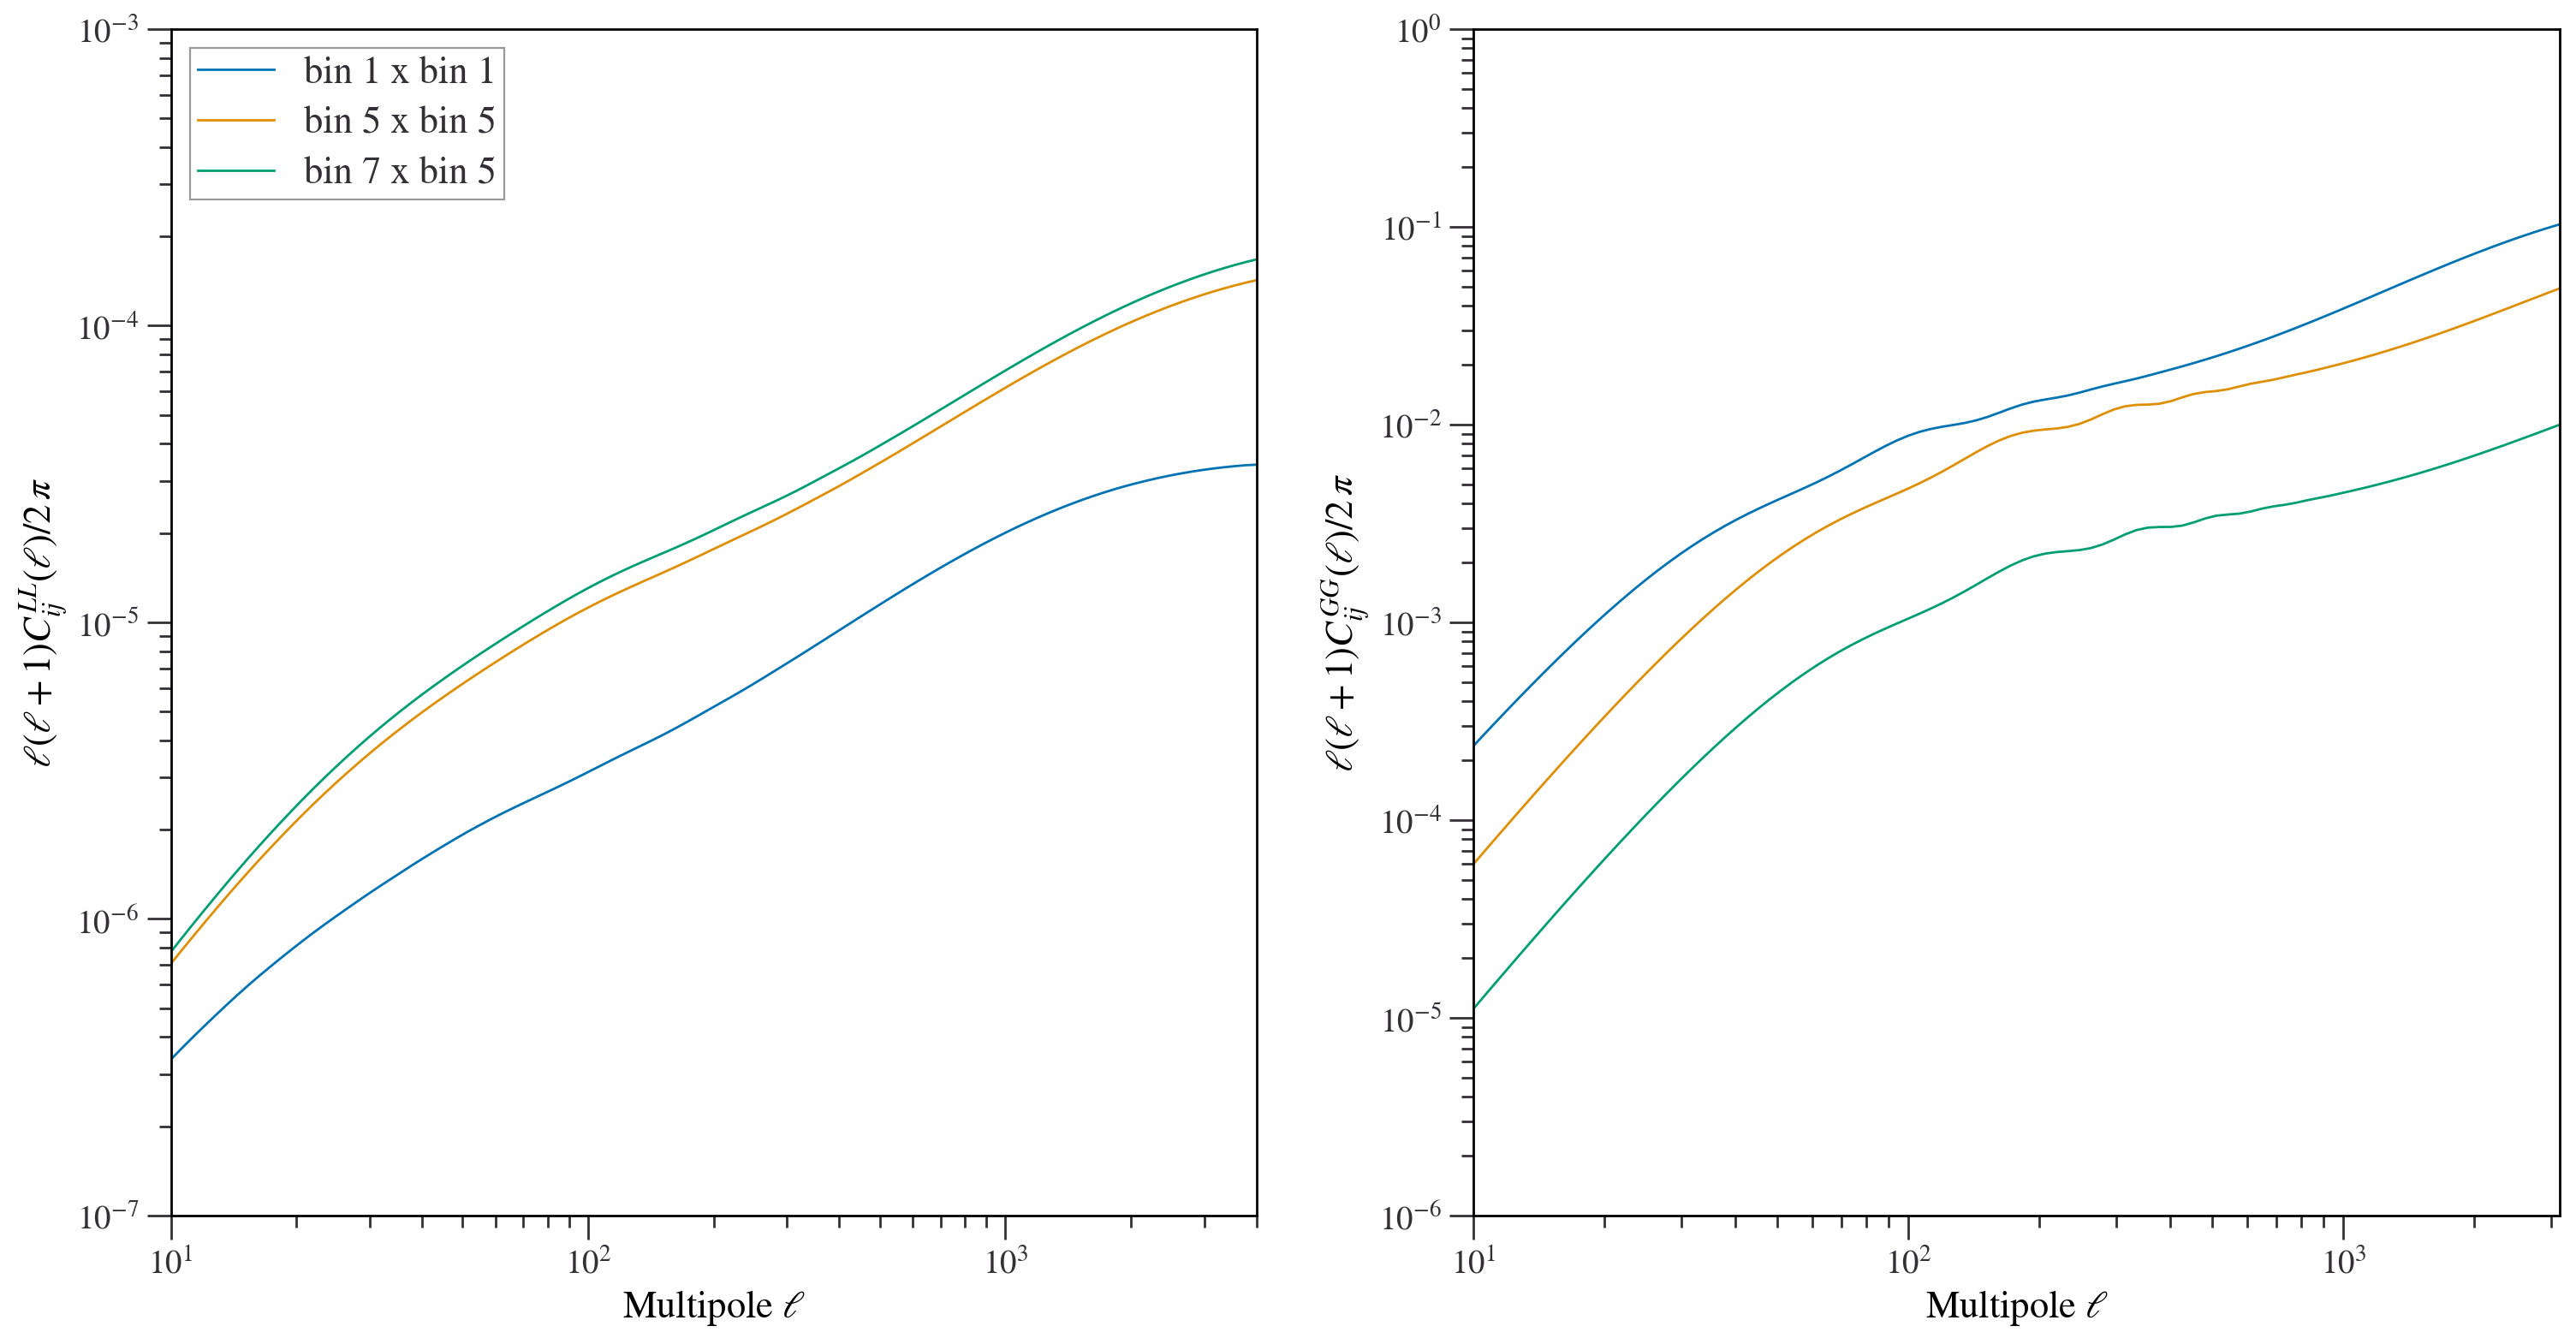

In [29]:
# choose here which bin combinations you want to plot
bins_plot = [[1,1],[5,5],[7,5]]

fig, axs =plt.subplots(1,2,figsize=(18,9))

colors = iter(color_pallete)

for i,j in bins_plot:
    c = next(colors)
    axs[0].loglog(ells_LL,ells_LL*(ells_LL+1)*Cl_LL[:,i,j]/(np.pi * 2),c=c,label='bin {} x bin {}'.format(i,j))
    axs[1].loglog(ells_GG,ells_GG*(ells_GG+1)*Cl_GG[:,i,j]/(np.pi * 2),c=c)
axs[0].legend(fontsize=16,loc='upper left')

axs[0].set_xlabel(r'Multipole $\ell$',fontsize=16)
axs[0].set_ylabel(r'$\ell(\ell+1)C_{ij}^{LL}(\ell)/2\,\pi$',fontsize=16)
axs[0].set_xlim(10,np.max(ells_LL))

axs[1].set_xlabel(r'Multipole $\ell$',fontsize=16)
axs[1].set_ylabel(r'$\ell(\ell+1)C_{ij}^{GG}(\ell)/2\,\pi$',fontsize=16)
axs[1].set_xlim(10,np.max(ells_GG))

